In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv("C:\\Users\\abdal\\Downloads\\diamonds.csv")

In [4]:
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53947 entries, 0 to 53946
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53947 non-null  int64  
 1   carat       53947 non-null  float64
 2   cut         53944 non-null  object 
 3   color       53946 non-null  object 
 4   clarity     53947 non-null  object 
 5   depth       53946 non-null  float64
 6   table       53947 non-null  float64
 7   price       53947 non-null  int64  
 8   x           53947 non-null  float64
 9   y           53947 non-null  float64
 10  z           53947 non-null  object 
dtypes: float64(5), int64(2), object(4)
memory usage: 4.5+ MB


In [6]:
df.describe()

,Unnamed: 0,carat,depth,table,price,x,y
count,53947.000000,53947.000000,53946.000000,53947.000000,53947.000000,53947.000000,53947.000000
mean,26973.000000,0.797936,61.749271,57.457143,3932.614158,5.731181,5.734549
std,15573.301823,0.473981,1.432571,2.234418,3989.233934,1.121691,1.142063
min,0.000000,0.200000,43.000000,43.000000,-200.000000,0.000000,0.000000
25%,13486.500000,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000
50%,26973.000000,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000
75%,40459.500000,1.040000,62.500000,59.000000,5324.000000,6.540000,6.540000
max,53946.000000,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000


In [7]:
null_counts = df.isnull().sum()
null_counts

Unnamed: 0    0
carat         0
cut           3
color         1
clarity       0
depth         1
table         0
price         0
x             0
y             0
z             0
dtype: int64

In [8]:
df_raw = df.copy()

In [9]:
df['z'] = pd.to_numeric(df['z'], errors='coerce')

In [10]:
df.drop(columns=['Unnamed: 0'], inplace=True)

In [11]:
df = df[(df['price'] > 0) & (df['x'] > 0) & (df['y'] > 0) & (df['z'] > 0)]

In [12]:
df['cut'].fillna(df['cut'].mode()[0], inplace=True)
df['color'].fillna(df['color'].mode()[0], inplace=True)
df['depth'].fillna(df['depth'].median(), inplace=True)
df['z'].fillna(df['z'].median(), inplace=True)
df['cut'] = df['cut'].str.upper()


C:\Users\abdal\AppData\Local\Temp\ipykernel_17076\3995676440.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['cut'].fillna(df['cut'].mode()[0], inplace=True)
C:\Users\abdal\AppData\Local\Temp\ipykernel_17076\3995676440.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For 

In [13]:
duplicate_count = df.duplicated().sum()
duplicate_count

np.int64(152)

In [14]:
df.drop_duplicates(inplace=True)

In [15]:
print(df.duplicated().sum())

0


In [16]:
null_counts_after_fix = df.isnull().sum()
null_counts_after_fix

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

# Correlation Matrix:

- Strong positive correlations exist between price and carat (0.98), x (0.97), y (0.97), and z (0.95), indicating these factors significantly influence price
- A weak negative correlation (-0.3) is observed between depth and table, suggesting a slight inverse relationship

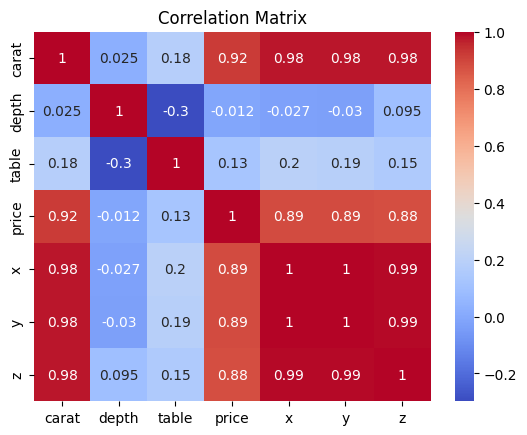

In [32]:
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Histograms (carat, depth, table, price, x, y, z):

- Carat: Most diamonds are between 0 and 2 carats, with a sharp drop-off beyond 3
- Depth: Peaks around 60-65, with a tight distribution, reflecting a standard depth range
- Table: Concentrated between 50 and 60, with a peak around 55-60
- Price: Skewed distribution, with most prices below 7500, and a long tail extending to 17500
- x, y, z: x and y show similar distributions peaking around 5-6, while z peaks around 5-10, indicating dimensional consistency

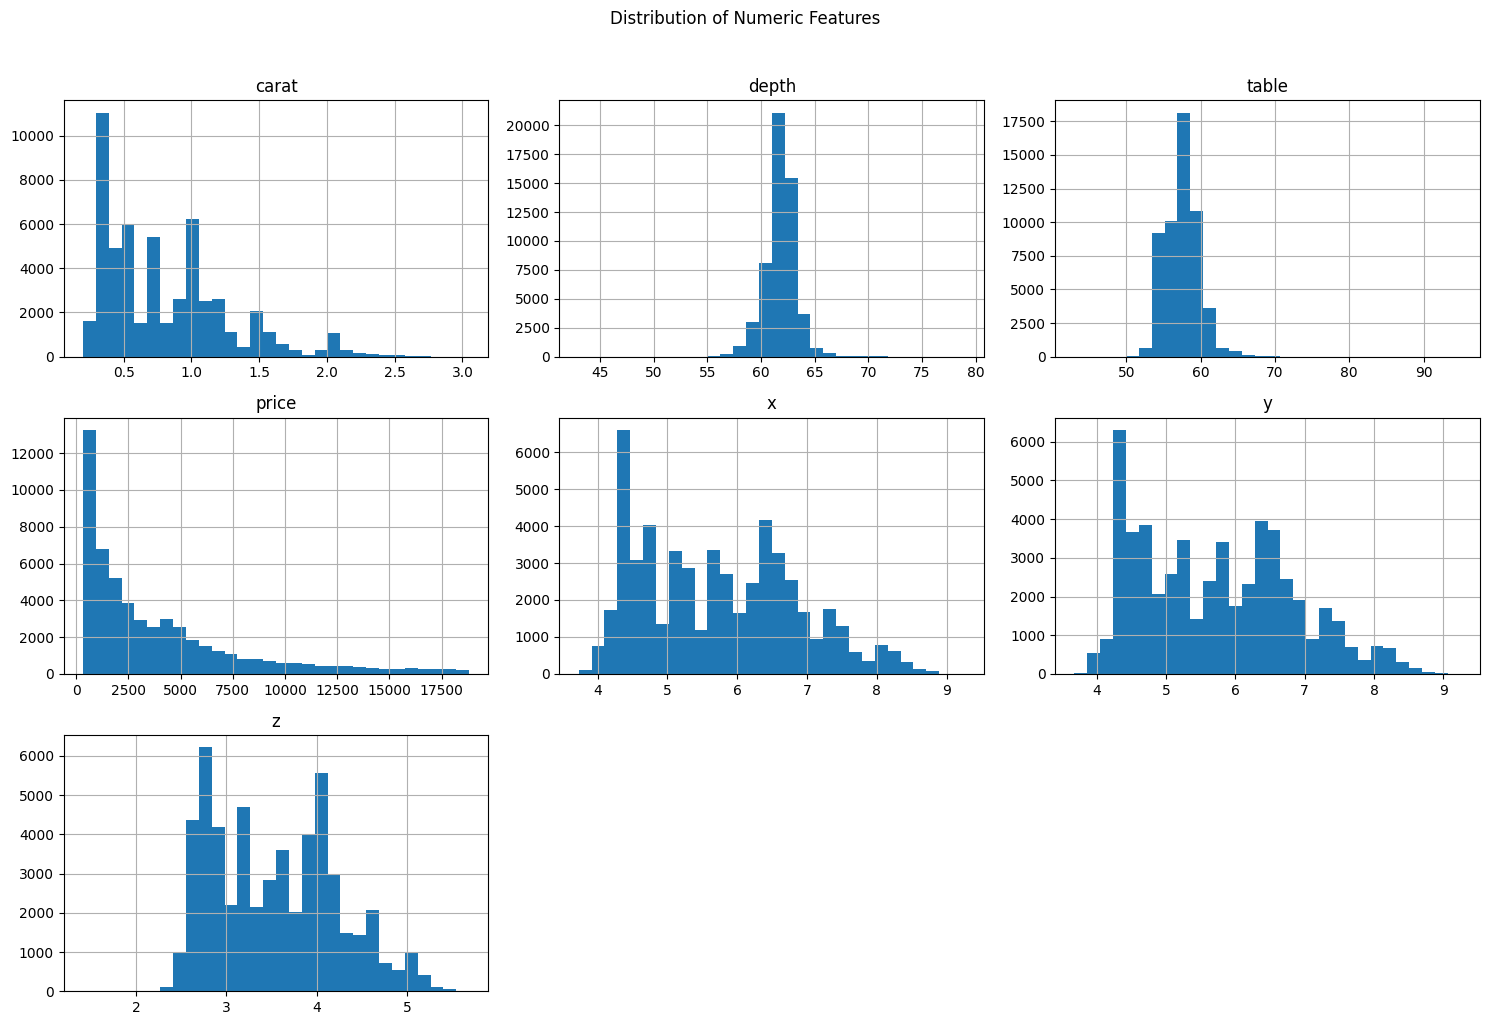

In [33]:
df.hist(bins=30, figsize=(15, 10))
plt.suptitle("Distribution of Numeric Features", y=1.02)
plt.tight_layout()
plt.show()

# Count Plots:

- Color: E, G, and H are the most common colors, while J and I are less frequent
- Clarity: SI2, SI1, VS1, and VS2 are the most common clarity grades, with IF and VVS2 being rare
- Cut: Ideal is the most frequent cut, followed by Premium and Very Good, while Good and Fair are less common

C:\Users\abdal\AppData\Local\Temp\ipykernel_17076\2130540429.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='pastel')


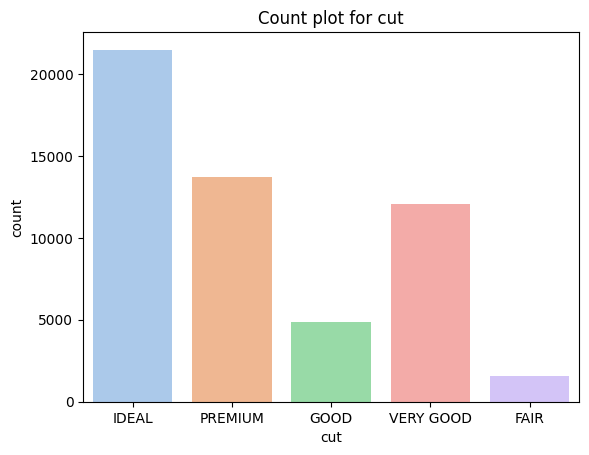

C:\Users\abdal\AppData\Local\Temp\ipykernel_17076\2130540429.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='pastel')


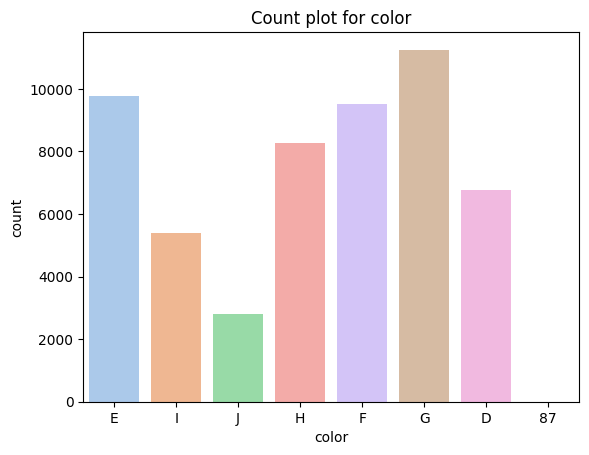

C:\Users\abdal\AppData\Local\Temp\ipykernel_17076\2130540429.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='pastel')


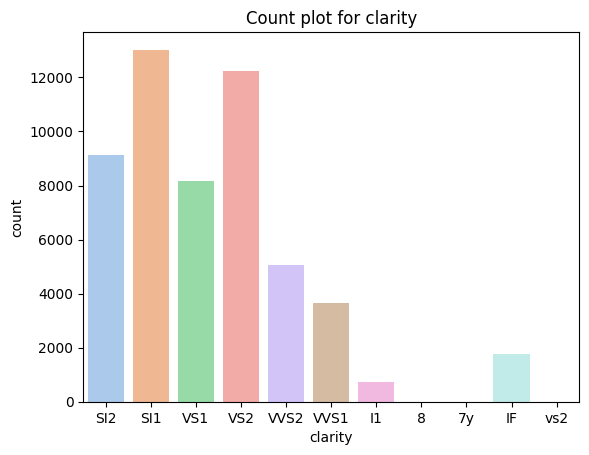

In [35]:
categorical_cols = ['cut', 'color', 'clarity']
for col in categorical_cols:
    sns.countplot(data=df, x=col, palette='pastel')
    plt.title(f"Count plot for {col}")
    plt.show()

# Cut vs Price Distribution:

- Ideal and Premium cuts show the widest price ranges, with outliers reaching up to 17500, indicating potential for high-value diamonds
- Good, Very Good, and Fair cuts have more concentrated price distributions, mostly between 2500 and 7500, with fewer extreme values

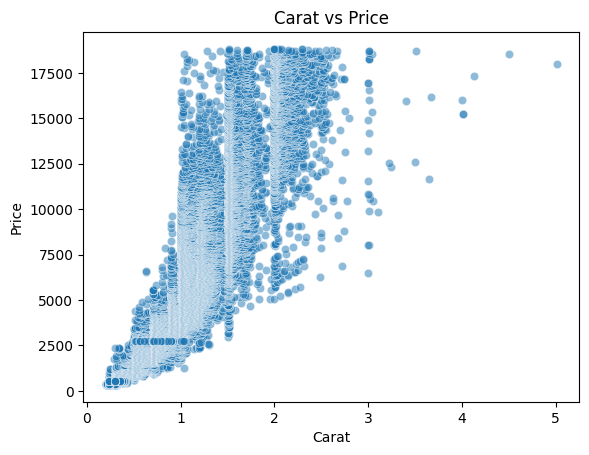

In [20]:
sns.scatterplot(x='carat', y='price', data=df, alpha=0.5)
plt.title('Carat vs Price')
plt.xlabel('Carat')
plt.ylabel('Price')
plt.show()

## Depth vs Price:

- Prices are most densely distributed around a depth of 60-65, with a peak concentration suggesting this range is common for higher-priced diamonds
- Depths outside 55-70 show fewer data points and lower prices, indicating depth has a narrower optimal range for value

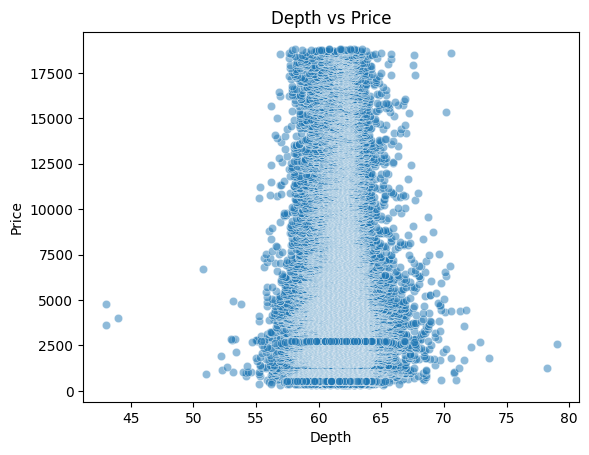

In [21]:
sns.scatterplot(x='depth', y='price', data=df, alpha=0.5)
plt.title('Depth vs Price')
plt.xlabel('Depth')
plt.ylabel('Price')
plt.show()


# Cut vs Price Distribution:

**Ideal Cut:**

- Price range: Approximately 2500 to 17500
- Outliers extend up to 17500, indicating some high-value diamonds


**Premium Cut:**

- Price range: Approximately 2500 to 17500
- Similar to Ideal, with outliers reaching 17500, suggesting high variability


**Good Cut:**

- Price range: Approximately 2500 to 15000
- Fewer high-end outliers compared to Ideal and Premium


**Very Good Cut:**

- Price range: Approximately 2500 to 15000
- Consistent with Good, with a few outliers


**Fair Cut:**

- Price range: Approximately 2500 to 17500
- Notable outliers up to 17500, despite a generally lower median trend



## Observations

- Ideal, Premium, and Fair cuts exhibit the most significant outliers (up to 17500), suggesting these cuts can command premium prices under certain conditions (e.g., higher carat or clarity)
- The presence of outliers indicates potential for high-value diamonds across all cuts, with Ideal and Premium showing the broadest price variability

C:\Users\abdal\AppData\Local\Temp\ipykernel_17076\590406252.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='cut', y='price', data=df, palette='pastel')


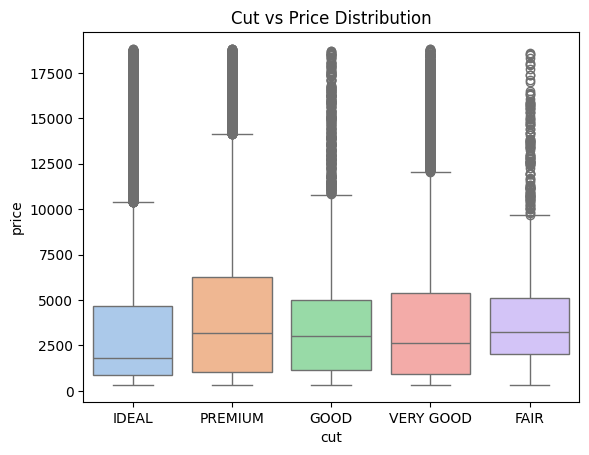

In [39]:
sns.boxplot(x='cut', y='price', data=df, palette='pastel')
plt.title('Cut vs Price Distribution')
plt.show()

# 3D :

- Prices increase with carat weight, with a dense concentration at higher carat values
- Depth shows a narrow range (around 60-65) with varying prices, indicating it may not be a primary price driver

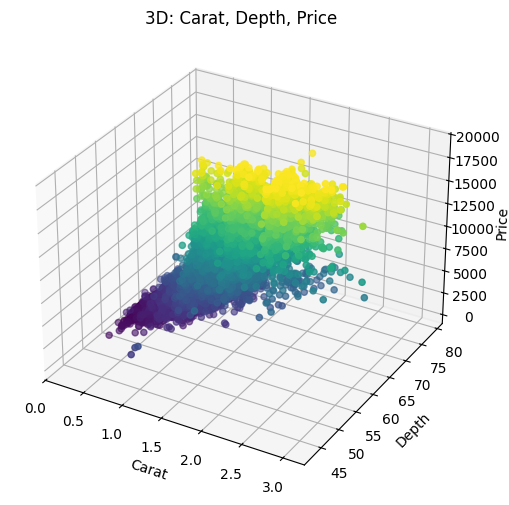

In [41]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['carat'], df['depth'], df['price'], c=df['price'], cmap='viridis')
ax.set_xlabel('Carat')
ax.set_ylabel('Depth')
ax.set_zlabel('Price')
plt.title("3D: Carat, Depth, Price")
plt.show()

In [24]:
# Remove outliers for dimensions using IQR (to handle extremes)
for col in ['x', 'y', 'z']:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    df = df[(df[col] >= Q1 - 1.5 * IQR) & (df[col] <= Q3 + 1.5 * IQR)]

# Encoding the categorical data
##### - I used one hot encoding for categorical data because text values are just names or categories, there is no order between them.(Nominal Data)

In [25]:
df_encoded = pd.get_dummies(df, columns=['cut', 'color', 'clarity'], drop_first=False)

print(df_encoded)

       carat  depth  table  price     x     y     z  cut_FAIR  cut_GOOD  \
0       0.23   61.5   55.0    326  3.95  3.98  2.43     False     False   
1       0.21   59.8   61.0    326  3.89  3.84  2.31     False     False   
2       0.23   56.9   65.0    327  4.05  4.07  2.31     False      True   
3       0.29   62.4   58.0    334  4.20  4.23  2.63     False     False   
4       0.31   63.3   58.0    335  4.34  4.35  2.75     False      True   
...      ...    ...    ...    ...   ...   ...   ...       ...       ...   
53935   0.72   60.8   57.0   2757  5.75  5.76  3.50     False     False   
53936   0.72   63.1   55.0   2757  5.69  5.75  3.61     False      True   
53937   0.70   62.8   60.0   2757  5.66  5.68  3.56     False     False   
53938   0.86   61.0   58.0   2757  6.15  6.12  3.74     False     False   
53939   0.75   62.2   55.0   2757  5.83  5.87  3.00     False     False   

       cut_IDEAL  ...  clarity_8  clarity_I1  clarity_IF  clarity_SI1  \
0           True  ...     

# Scale numeric data
Skewness is a statistical measure that describes the shape of a data distribution:

- If skewness is close to zero, the distribution is nearly symmetrical, like a bell-shaped (Gaussian) curve.
- If skewness is positive, the distribution has a long tail on the right (large values are rare), like diamond prices where very expensive diamonds are uncommon.
- If skewness is negative, the distribution has a long tail on the left (small values are rare).

Skewness shows whether the distribution is close to normal or highly skewed. If the distribution is normal (skewness near 0), StandardScaler is straightforward to use. If there's strong skewness (like price or y), we need transformations like Log or RobustScaler.
##### In this dataset, we observed: 
- carat: skewness = 1.11 (moderate positive skew, long tail for large values).
- depth: skewness = -0.11 (near-normal, close to zero).
- table: skewness ~0.8 (mild positive skew, estimated from statistics).
- price: skewness = 1.62 (strong positive skew, long tail for high prices).
- x: skewness = 0.38 (mild positive skew).
- y: skewness = 2.45 (very strong positive skew due to outliers like 58.9).
- z: skewness = 1.53 (strong positive skew).

In [47]:
print(df['depth'].skew())
print(df['table'].skew())
print(df['price'].skew())
print(df['carat'].skew())
print(df['x'].skew())
print(df['y'].skew())
print(df['z'].skew())

-0.11792768054318693
0.7922346190738953
1.6192561068498672
1.0410247382268083
0.3821997350627518
0.3776708976186899
0.3745241179174758


depth and table: Low skewness (-0.11 and 0.8) confirmed near-normal distributions, so we used StandardScaler as it’s ideal for such cases.

In [48]:
from sklearn.preprocessing import StandardScaler, RobustScaler

df_encoded['price'] = np.log1p(df_encoded['price'])
price_scaler = StandardScaler()
df_encoded['price'] = price_scaler.fit_transform(df_encoded[['price']])

c:\Users\abdal\AppData\Local\Programs\Python\Python313\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


depth and table: Low skewness (-0.11 and 0.8) confirmed near-normal distributions, so we used StandardScaler as it’s ideal for such cases.

In [49]:
std_scaler = StandardScaler()
df_encoded[['depth', 'table']] = std_scaler.fit_transform(df_encoded[['depth', 'table']])

carat, x, y, z: Positive skewness (1.11, 0.38, 2.45, 1.53) with outliers (even after removing errors) led us to choose RobustScaler to handle outliers without distortion.

In [50]:
robust_scaler = RobustScaler()
df_encoded[['carat', 'x', 'y', 'z']] = robust_scaler.fit_transform(df_encoded[['carat', 'x', 'y', 'z']])

In [51]:
print(df_encoded.head())

      carat     depth     table  price         x         y         z  \
0 -0.734375 -0.173327 -1.100604    NaN -0.956284 -0.955801 -0.982143   
1 -0.765625 -1.364143  1.586967    NaN -0.989071 -1.033149 -1.089286   
2 -0.734375 -3.395535  3.378681    NaN -0.901639 -0.906077 -1.089286   
3 -0.640625  0.457105  0.243181    NaN -0.819672 -0.817680 -0.803571   
4 -0.609375  1.087536  0.243181    NaN -0.743169 -0.751381 -0.696429   

   cut_FAIR  cut_GOOD  cut_IDEAL  ...  clarity_8  clarity_I1  clarity_IF  \
0     False     False       True  ...      False       False       False   
1     False     False      False  ...      False       False       False   
2     False      True      False  ...      False       False       False   
3     False     False      False  ...      False       False       False   
4     False      True      False  ...      False       False       False   

   clarity_SI1  clarity_SI2  clarity_VS1  clarity_VS2  clarity_VVS1  \
0        False         True        Fals